In [10]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [11]:
#Load and preprocess the dataset
# Load the dataset
df = pd.read_csv('cardio_train.csv')

# Convert columns to appropriate data types
df = df.astype({
    'id': int,
    'age': int,
    'gender': int,
    'height': float,
    'weight': float,
    'ap_hi': int,
    'ap_lo': int,
    'cholesterol': int,
    'gluc': int,
    'smoke': int,
    'alco': int,
    'active': int,
    'y': int
})

# Rename 'y' to 'cardio' for clarity
df = df.rename(columns={'y': 'cardio'})

# Basic data exploration
print("First few rows of the dataset:")
print(df.head())
print("\nDataframe info:")
print(df.info())
print("\nColumn names:")
print(df.columns)
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

First few rows of the dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2   168.0    62.0    110     80            1     1      0   
1   1  20228       1   156.0    85.0    140     90            3     1      0   
2   2  18857       1   165.0    64.0    130     70            3     1      0   
3   3  17623       2   169.0    82.0    150    100            1     1      0   
4   4  17474       1   156.0    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int32  
 1   age          70000 non-null  int32  
 2   gender       70000 non-null  int3

In [12]:
#Data Interpretation and Feature Engineering

print("Data Interpretation:")
print("1. The dataset contains 70,000 records with 13 features.")
print("2. There are no missing values in the dataset.")
print("3. The 'cardio' column represents the target variable (cardiovascular disease presence).")
print("4. Age is currently in days, which we'll convert to years.")
print("5. Gender is encoded as 1 and 2 (likely 1 for female and 2 for male).")
print("6. There are some potential outliers or errors in the data:")
print("   - Height ranges from 55 to 250 cm")
print("   - Weight ranges from 10 to 200 kg")
print("   - Some blood pressure values are negative or extremely high")

# Feature engineering
print("\nFeature Engineering:")

# Convert age from days to years
df['age_years'] = df['age'] / 365.25
print("1. Created 'age_years' column")

# Calculate BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
print("2. Calculated BMI")

# Create blood pressure categories
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif (120 <= systolic < 130) and diastolic < 80:
        return 'Elevated'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90):
        return 'Hypertension Stage 1'
    elif systolic >= 140 or diastolic >= 90:
        return 'Hypertension Stage 2'
    else:
        return 'Error'

df['bp_category'] = df.apply(lambda x: bp_category(x['ap_hi'], x['ap_lo']), axis=1)
print("3. Created blood pressure categories")

# Handle outliers and errors
df = df[(df['height'] >= 140) & (df['height'] <= 220)]  # Reasonable height range
df = df[(df['weight'] >= 40) & (df['weight'] <= 160)]   # Reasonable weight range
df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)]          # Remove negative blood pressure
df = df[df['ap_hi'] <= 300]                             # Remove extremely high systolic BP
df = df[df['ap_lo'] <= 200]                             # Remove extremely high diastolic BP
print("4. Removed outliers and erroneous data")

print("\nUpdated dataset shape:", df.shape)
print("\nFirst few rows after feature engineering:")
print(df.head())
print("\nUpdated column names:")
print(df.columns)

# Display summary statistics for new features
print("\nSummary statistics for new features:")
print(df[['age_years', 'bmi']].describe())

print("\nBlood pressure category distribution:")
print(df['bp_category'].value_counts(normalize=True))

Data Interpretation:
1. The dataset contains 70,000 records with 13 features.
2. There are no missing values in the dataset.
3. The 'cardio' column represents the target variable (cardiovascular disease presence).
4. Age is currently in days, which we'll convert to years.
5. Gender is encoded as 1 and 2 (likely 1 for female and 2 for male).
6. There are some potential outliers or errors in the data:
   - Height ranges from 55 to 250 cm
   - Weight ranges from 10 to 200 kg
   - Some blood pressure values are negative or extremely high

Feature Engineering:
1. Created 'age_years' column
2. Calculated BMI
3. Created blood pressure categories
4. Removed outliers and erroneous data

Updated dataset shape: (68760, 16)

First few rows after feature engineering:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2   168.0    62.0    110     80            1     1      0   
1   1  20228       1   156.0    85.0    140     90            3     1      

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


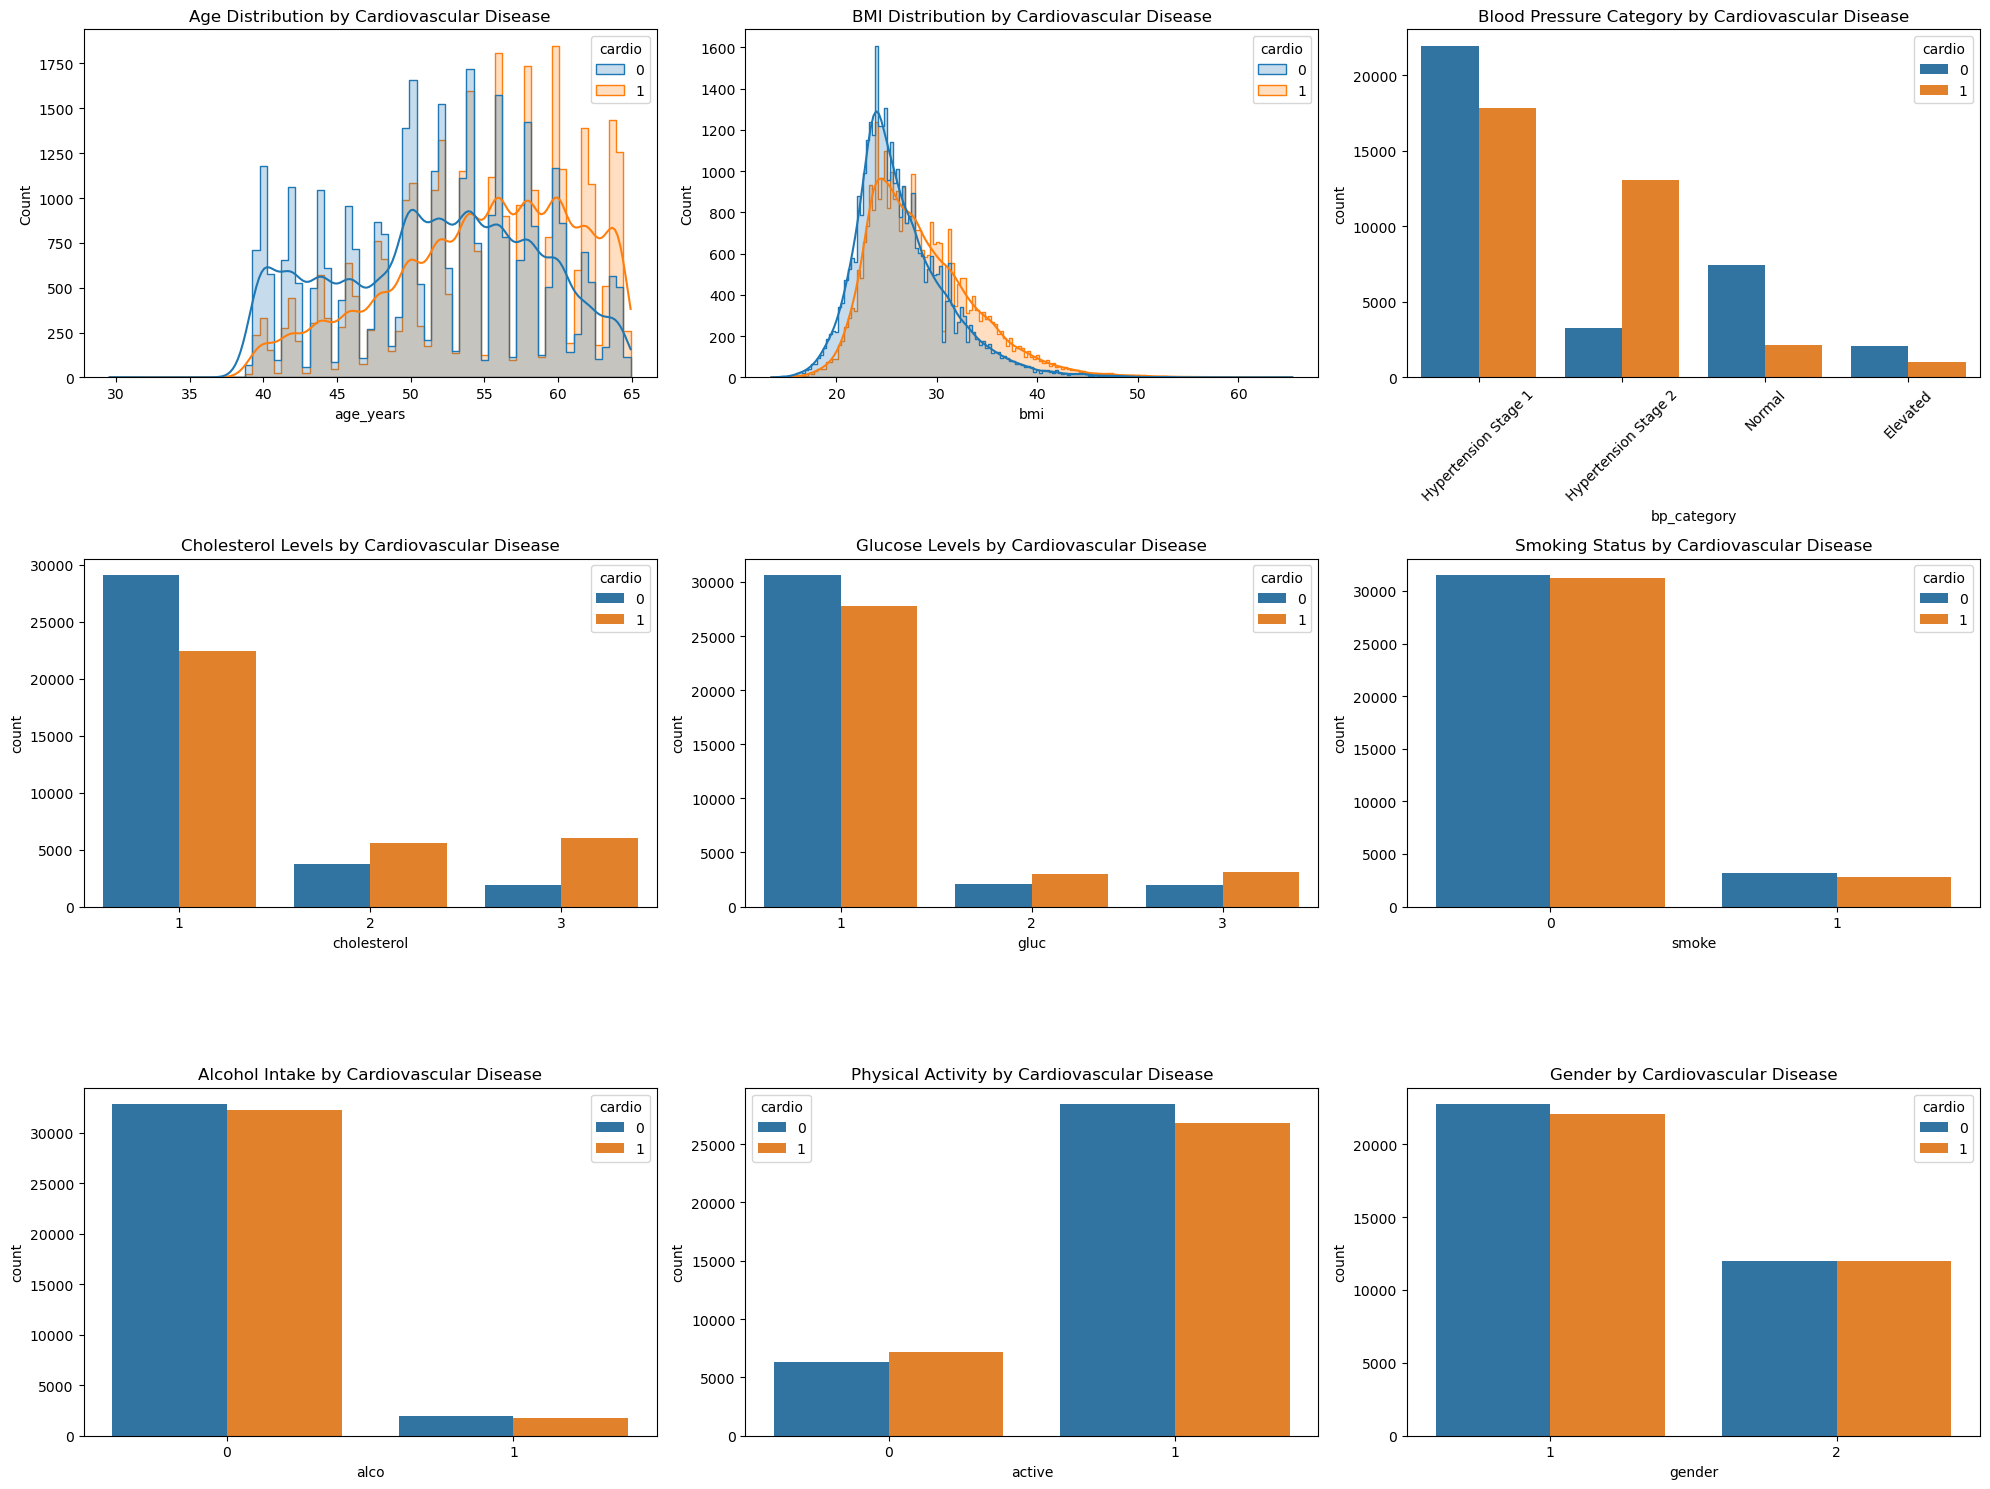

In [13]:
#Data Visualization (Revised)

import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'cardio' to string type for proper categorical plotting
df['cardio'] = df['cardio'].astype(str)

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# 1. Age distribution
plt.subplot(3, 3, 1)
sns.histplot(data=df, x='age_years', hue='cardio', kde=True, element='step')
plt.title('Age Distribution by Cardiovascular Disease')

# 2. BMI distribution
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='bmi', hue='cardio', kde=True, element='step')
plt.title('BMI Distribution by Cardiovascular Disease')

# 3. Blood Pressure Category
plt.subplot(3, 3, 3)
sns.countplot(data=df, x='bp_category', hue='cardio')
plt.title('Blood Pressure Category by Cardiovascular Disease')
plt.xticks(rotation=45)

# 4. Cholesterol levels
plt.subplot(3, 3, 4)
sns.countplot(data=df, x='cholesterol', hue='cardio')
plt.title('Cholesterol Levels by Cardiovascular Disease')

# 5. Glucose levels
plt.subplot(3, 3, 5)
sns.countplot(data=df, x='gluc', hue='cardio')
plt.title('Glucose Levels by Cardiovascular Disease')

# 6. Smoking status
plt.subplot(3, 3, 6)
sns.countplot(data=df, x='smoke', hue='cardio')
plt.title('Smoking Status by Cardiovascular Disease')

# 7. Alcohol intake
plt.subplot(3, 3, 7)
sns.countplot(data=df, x='alco', hue='cardio')
plt.title('Alcohol Intake by Cardiovascular Disease')

# 8. Physical activity
plt.subplot(3, 3, 8)
sns.countplot(data=df, x='active', hue='cardio')
plt.title('Physical Activity by Cardiovascular Disease')

# 9. Gender
plt.subplot(3, 3, 9)
sns.countplot(data=df, x='gender', hue='cardio')
plt.title('Gender by Cardiovascular Disease')

plt.tight_layout()
plt.show()

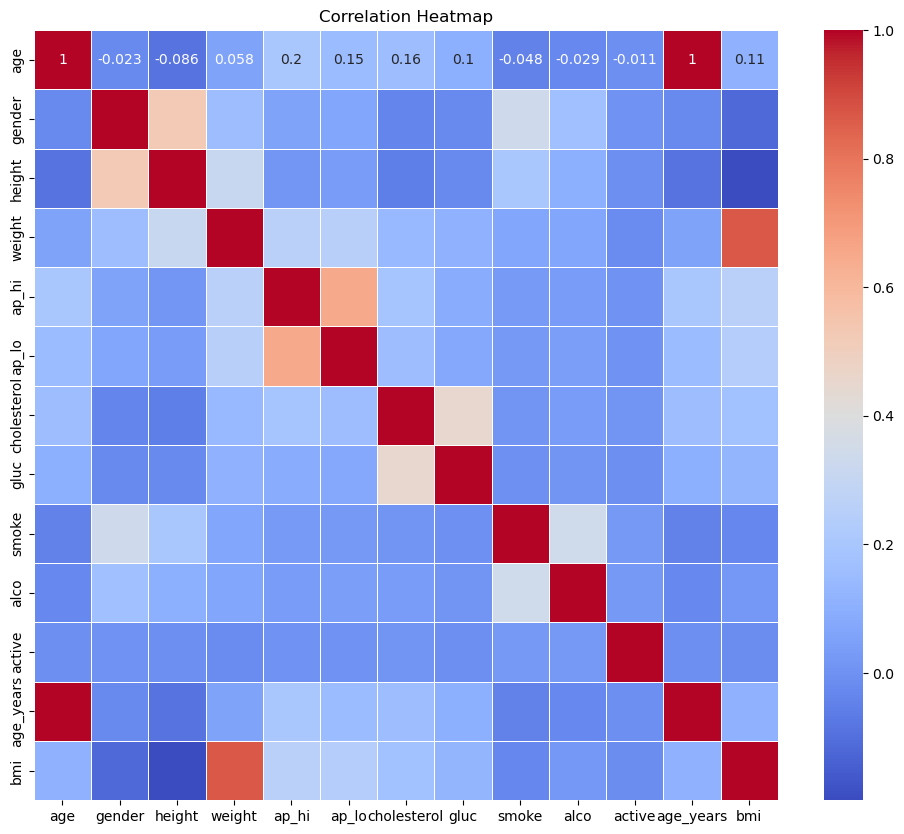

In [14]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop(['id', 'bp_category', 'cardio'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
#Prepare data for modeling (Updated)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Recreate the blood pressure category
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif (120 <= systolic < 130) and diastolic < 80:
        return 'Elevated'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90):
        return 'Hypertension Stage 1'
    elif systolic >= 140 or diastolic >= 90:
        return 'Hypertension Stage 2'
    else:
        return 'Error'

df['bp_category'] = df.apply(lambda x: bp_category(x['ap_hi'], x['ap_lo']), axis=1)

# Convert 'cardio' back to int for modeling if it's not already
df['cardio'] = df['cardio'].astype(int)

# Prepare the features and target
X = df.drop(['id', 'cardio', 'age'], axis=1)
X = pd.get_dummies(X, columns=['bp_category'], drop_first=True)  # One-hot encode bp_category
y = df['cardio']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features included in the model:")
print(X.columns)
print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Features included in the model:
Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi',
       'bp_category_Hypertension Stage 1', 'bp_category_Hypertension Stage 2',
       'bp_category_Normal'],
      dtype='object')

Shape of training data: (55008, 15)
Shape of testing data: (13752, 15)


In [16]:
#Train and evaluate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("\nCross-validation ROC AUC scores:", cv_scores)
print("Mean ROC AUC score:", cv_scores.mean())

Confusion Matrix:
[[4932 1953]
 [2080 4787]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6885
           1       0.71      0.70      0.70      6867

    accuracy                           0.71     13752
   macro avg       0.71      0.71      0.71     13752
weighted avg       0.71      0.71      0.71     13752


ROC AUC Score: 0.7720373262756984

Cross-validation ROC AUC scores: [0.76499989 0.77537431 0.77017419 0.76819107 0.77267618]
Mean ROC AUC score: 0.77028312829093


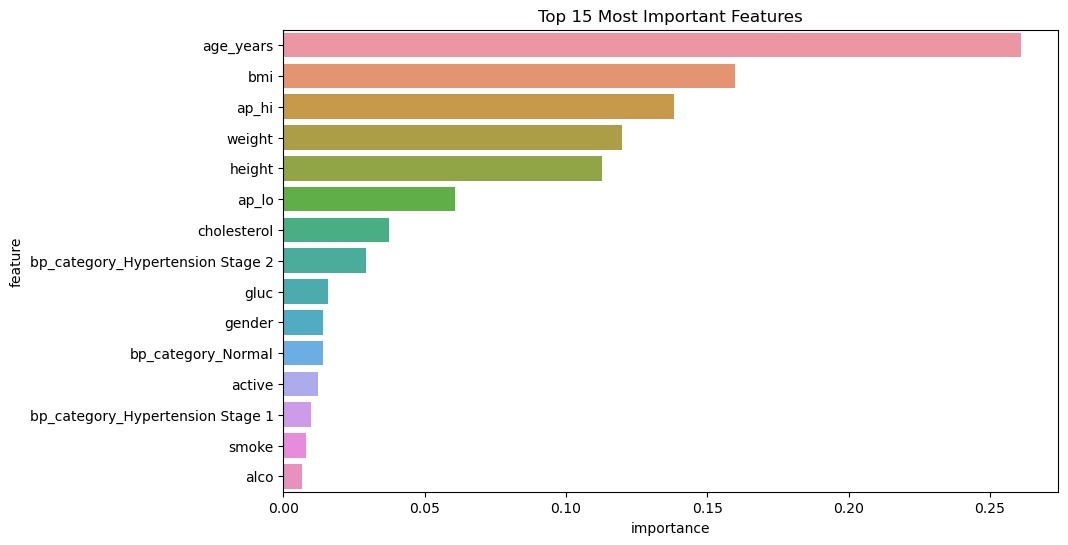


Top 15 Most Important Features:
                             feature  importance
10                         age_years    0.261109
11                               bmi    0.159823
3                              ap_hi    0.138217
2                             weight    0.119686
1                             height    0.112809
4                              ap_lo    0.060766
5                        cholesterol    0.037305
13  bp_category_Hypertension Stage 2    0.029305
6                               gluc    0.015933
0                             gender    0.014180
14                bp_category_Normal    0.013930
9                             active    0.012348
12  bp_category_Hypertension Stage 1    0.009897
7                              smoke    0.007995
8                               alco    0.006697


In [17]:
#Feature importance (Corrected)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.show()

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

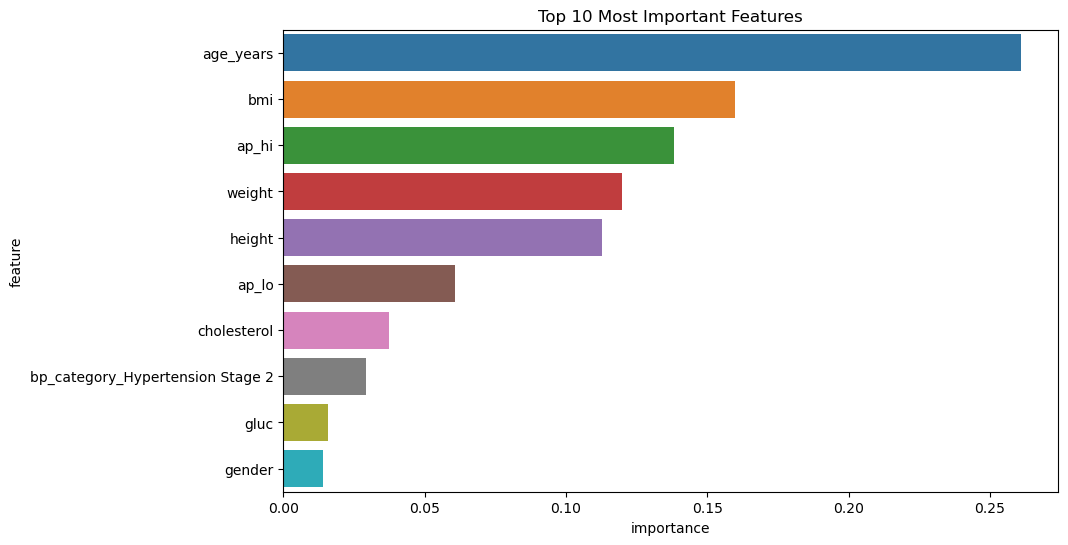

In [18]:
#Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()